## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"
df = pd.read_csv(url)

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [3]:
df.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [4]:
df.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [6]:
linhas, colunas = df.shape
print(f'\nO DataFrame possui {linhas} linhas e {colunas} colunas.')


O DataFrame possui 18 linhas e 4 colunas.


### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [7]:
df.dtypes

,0
Nome,object
Idade,int64
Notas,float64
Aprovado,bool


In [10]:
df.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [12]:
df['Nome']

,Nome
0,Ary
1,Ana
2,Cátia
3,Denis
4,Beto
5,Bruna
6,Dara
7,Carlos
8,Alice
9,Vitor


In [13]:
df[['Idade', 'Notas']]

,Idade,Notas
0,20,7.5
1,18,NaN
2,27,2.5
3,18,5.0
4,21,10.0
5,23,NaN
6,21,7.0
7,19,6.0
8,35,5.6
9,28,NaN


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [15]:
estatisticas_descritivas = df.describe()

print("\nEstatísticas descritivas básicas:")
print(estatisticas_descritivas)


Estatísticas descritivas básicas:
           Idade      Notas
count  18.000000  12.000000
mean   25.500000   6.800000
std     6.070662   2.204953
min    18.000000   2.500000
25%    21.000000   5.450000
50%    24.500000   7.000000
75%    28.750000   8.250000
max    37.000000  10.000000


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [18]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [20]:
media_quartos = df['Quartos'].mean()
print(f"A média de quartos por apartamento é: {media_quartos:.2f}")

A média de quartos por apartamento é: 2.48


### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [21]:
bairros_unicos = df['Bairro'].nunique()

In [22]:
print(f"Número de bairros únicos na base de dados: {bairros_unicos}")

Número de bairros únicos na base de dados: 149


### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [26]:
media_aluguel_bairros = df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)
print("\nBairros com as médias de valor de aluguel mais elevadas:")
print(media_aluguel_bairros.apply(lambda x: f"{x:.2f}"))


Bairros com as médias de valor de aluguel mais elevadas:
Bairro
Joá                       15500.00
Arpoador                  12429.77
Cidade Jardim             12000.00
Ipanema                    9487.21
Botafogo                   9369.21
                            ...   
Inhoaíba                    650.00
Cosmos                      610.00
Santa Cruz                  590.00
Paciência                   510.00
Ricardo de Albuquerque      340.00
Name: Valor, Length: 149, dtype: object


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

<function matplotlib.pyplot.show(close=None, block=None)>

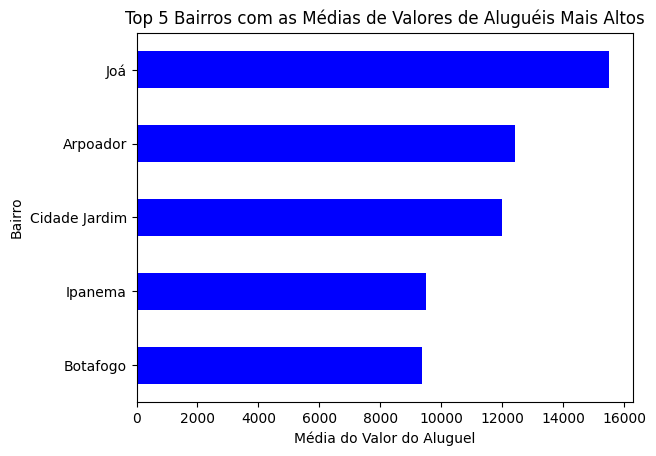

In [30]:
top_5_bairros = media_aluguel_bairros.head(5)
top_5_bairros.plot(kind='barh', color='blue')
plt.xlabel('Média do Valor do Aluguel')
plt.ylabel('Bairro')
plt.title('Top 5 Bairros com as Médias de Valores de Aluguéis Mais Altos')
plt.gca().invert_yaxis()
plt.show

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [31]:
# Importando novamente os dados
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"
df = pd.read_csv(url)

### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [35]:
df.isnull().sum()

,0
Nome,0
Idade,0
Notas,0
Aprovado,0


In [33]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [34]:
df.isnull().sum()

,0
Nome,0
Idade,0
Notas,0
Aprovado,0


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [37]:
alunos_a_remover = df.query('Nome == "Alice" | Nome == "Carlos"').index

In [39]:
df.drop(alunos_a_remover, axis=0, inplace=True)

In [41]:
alunos_a_remover

Index([7, 8], dtype='int64')

In [43]:
df.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [44]:
alunos_aprovados = df[df['Notas'] >= 6.0]

In [46]:
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,7.0,False
4,Beto,21,10.0,True
5,Bruna,23,7.0,False
6,Dara,21,7.0,True
9,Vitor,28,7.0,False
10,Daniel,21,7.0,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
14,Paulo,37,7.0,False


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [47]:
alunos_aprovados.to_csv("alunos_aprovados.csv", index=False)

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [50]:
alunos_aprovados.loc[alunos_aprovados['Notas'] == 7.0, 'Notas'] = 8.0

In [51]:
print("\nDataFrame final com alunos aprovados e notas ajustadas:")
print(alunos_aprovados)


DataFrame final com alunos aprovados e notas ajustadas:
         Nome  Idade  Notas  Aprovado
0         Ary     20    7.5      True
1         Ana     18    8.0     False
4        Beto     21   10.0      True
5       Bruna     23    8.0     False
6        Dara     21    8.0      True
9       Vitor     28    8.0     False
10     Daniel     21    8.0     False
12  Sthefanie     26    9.5      True
13      Mirla     25    9.0      True
14      Paulo     37    8.0     False
15     Mylena     29    8.0      True
16      Lucas     33    8.0     False
17      Nadia     34    8.0      True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [52]:
# Importando novamente os dados
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"
df = pd.read_csv(url)

### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [54]:
df['Pontos_extras'] = df['Notas'] * 0.40
df

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,NaN,False,NaN
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,NaN,False,NaN


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [56]:
df['Notas_finais'] = df['Notas'] + df['Pontos_extras']
df

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.00,10.50
1,Ana,18,NaN,False,NaN,NaN
2,Cátia,27,2.5,False,1.00,3.50
3,Denis,18,5.0,False,2.00,7.00
4,Beto,21,10.0,True,4.00,14.00
5,Bruna,23,NaN,False,NaN,NaN
6,Dara,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,True,2.40,8.40
8,Alice,35,5.6,False,2.24,7.84
9,Vitor,28,NaN,False,NaN,NaN


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [58]:
df['Aprovado_final'] = df['Notas_finais'] >= 6.0
df

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,NaN,False,NaN,NaN,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,NaN,False,NaN,NaN,False


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [59]:
alunos_recuperados = df[(df['Notas'] < 6.0) & (df['Aprovado_final'] == True)]

In [60]:
print("Alunos que não estavam aprovados antes, mas foram aprovados após a soma dos pontos extras:")
print(alunos_recuperados)

Alunos que não estavam aprovados antes, mas foram aprovados após a soma dos pontos extras:
     Nome  Idade  Notas  Aprovado  Pontos_extras  Notas_finais  Aprovado_final
3   Denis     18    5.0     False           2.00          7.00            True
8   Alice     35    5.6     False           2.24          7.84            True
11   Igor     24    4.5     False           1.80          6.30            True
